In [18]:
#!/usr/bin/env python

from pgmpy.models import BayesianNetwork
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination
from math import sqrt

PhaseDamping = BayesianNetwork([
    ('q0m0', 'q0m1'),
    ('rv', 'q0m1'),
    # ('q0m1', 'meas'),
])

q0m0 = TabularCPD (
    variable = 'q0m0',
    variable_card = 4,
    values = [[1/2], [0], [0], [1/2]],
    state_names={'q0m0': ['I', 'X', 'Y', 'Z']}
)

rv = TabularCPD (
    variable = 'rv',
    variable_card = 2,
    values = [[(1+sqrt(1-9/25))/2], [(1-sqrt(1-9/25))/2]],
    state_names={'rv': ['I', 'PD']}
)

print(rv)

q0m1 = TabularCPD (
    variable='q0m1',
    variable_card = 4,
    values = [
        [ 1,0,0,0, 1,0,0,0 ],
        [ 0,1,0,0, 0,-1,0,0 ],
        [ 0,0,1,0, 0,0,-1,0 ],
        [ 0,0,0,1, 0,0,0,1 ],
    ],
    evidence = [ 'rv', 'q0m0' ],
    evidence_card = [2,4],
    state_names={'rv': ['I', 'PD'], 'q0m0': ['I', 'X', 'Y', 'Z'], 'q0m1': ['I', 'X', 'Y', 'Z']}
)

# meas = TabularCPD (
#     variable='meas',
#     variable_card = 2,
#     values = [
#         [ 1,1,0,0 ],
#         [ 1,-1,0,0 ],
#     ],
#     evidence = ['q0m1'],
#     evidence_card = [4],
#     state_names={'q0m1': ['I', 'X', 'Y', 'Z'], 'meas': ['|+><+|', '|-><-|']}
# )

PhaseDamping.add_cpds(
    q0m0,
    rv,
    q0m1,
    # meas
)
outcome = VariableElimination(PhaseDamping.to_markov_model()).query(['q0m1'])
print(type(outcome))
print(outcome)

# exit()

PhaseDampingParam = BayesianNetwork([
    ('q0m0', 'q0m1'),
    ('rv', 'q0m1'),
    # ('q0m1', 'meas'),
])
PhaseDampingParam.add_cpds(q0m0,q0m1)
PhaseDampingParamMN = PhaseDampingParam.to_markov_model()
PhaseDampingParamMN.add_factors(outcome)
print(VariableElimination(PhaseDampingParamMN).query(['rv']))

+--------+-----+
| rv(I)  | 0.9 |
+--------+-----+
| rv(PD) | 0.1 |
+--------+-----+
<class 'pgmpy.factors.discrete.DiscreteFactor.DiscreteFactor'>
+---------+-------------+
| q0m1    |   phi(q0m1) |
+=========+=============+
| q0m1(I) |      0.5000 |
+---------+-------------+
| q0m1(X) |      0.0000 |
+---------+-------------+
| q0m1(Y) |      0.0000 |
+---------+-------------+
| q0m1(Z) |      0.5000 |
+---------+-------------+
+--------+-----------+
| rv     |   phi(rv) |
+========+===========+
| rv(I)  |    0.5000 |
+--------+-----------+
| rv(PD) |    0.5000 |
+--------+-----------+


In [23]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

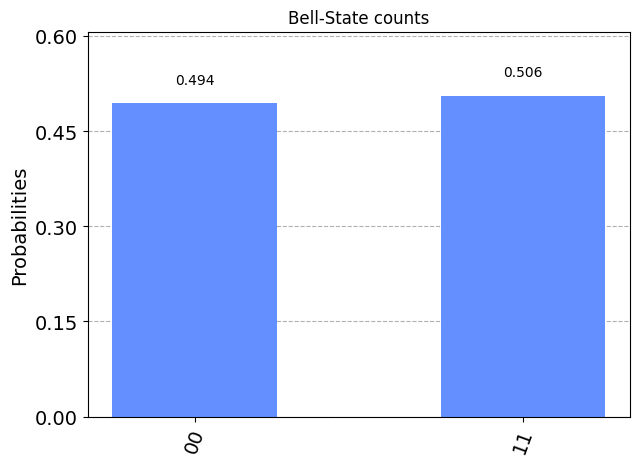

In [28]:
simulator = Aer.get_backend('aer_simulator')

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ, shots = 1000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')